Portfolio assignment week 5
1. SVC

The Scikit-learn library provides different kernels for the Support Vector Classifier, e.g. RBF or polynomial.

Based on the examples in the accompanying notebook, create your own SVC class and configure it with different kernels to see if you are able to have it correctly separate the moon-dataset. You can also use a precomputed kernel. In addition, there are several parameters you can tune to for better results. Make sure to go through the documentation.

Hint:

    Plot the support vectors for understanding how it works.
    Give arguments why a certain kernel behaves a certain way.

2. Model Evaluation

Classification metrics are important for measuring the performance of your model. Scikit-learn provides several options such as the classification_report and confusion_matrix functions. Another helpful option is the AUC ROC and precision-recall curve. Try to understand what these metrics mean and give arguments why one metric would be more important then others.

For instance, if you have to predict whether a patient has cancer or not, the number of false negatives is probably more important than the number of false positives. This would be different if we were predicting whether a picture contains a cat or a dog – or not: it all depends on the context. Thus, it is important to understand when to use which metric.

For this exercise, you can use your own dataset if that is eligable for supervised classification. Otherwise, you can use the breast cancer dataset which you can find on assemblix2019 (/data/datasets/DS3/). Go through the data science pipeline as you've done before:

    Try to understand the dataset globally.
    Load the data.
    Exploratory analysis
    Preprocess data (skewness, normality, etc.)
    Modeling (cross-validation and training)
    Evaluation

Create and train several LogisticRegression and SVM models with different values for their hyperparameters. Make use of the model evaluation techniques that have been described during the plenary part to determine the best model for this dataset. Accompany you elaborations with a conclusion, in which you explicitely interpret these evaluation and describe why the different metrics you are using are important or not. Make sure you take the context of this dataset into account.

---

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yaml
plt.style.use('dark_background')

In [84]:
with open('config.yaml','r') as config_file:
    config = yaml.load(config_file, Loader=yaml.SafeLoader)

bc_data = pd.read_csv(config["breast_cancer_data"])

bc_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [85]:
# alterations to the dataframe, changing obj to str
bc_data.diagnosis = bc_data.diagnosis.astype(str)
# check the sample types
print(f'Unique types: {bc_data.diagnosis.unique()}')
# check missing values
print(f'missing values: {bc_data.isnull().values.sum()}')

Unique types: ['M' 'B']
missing values: 0


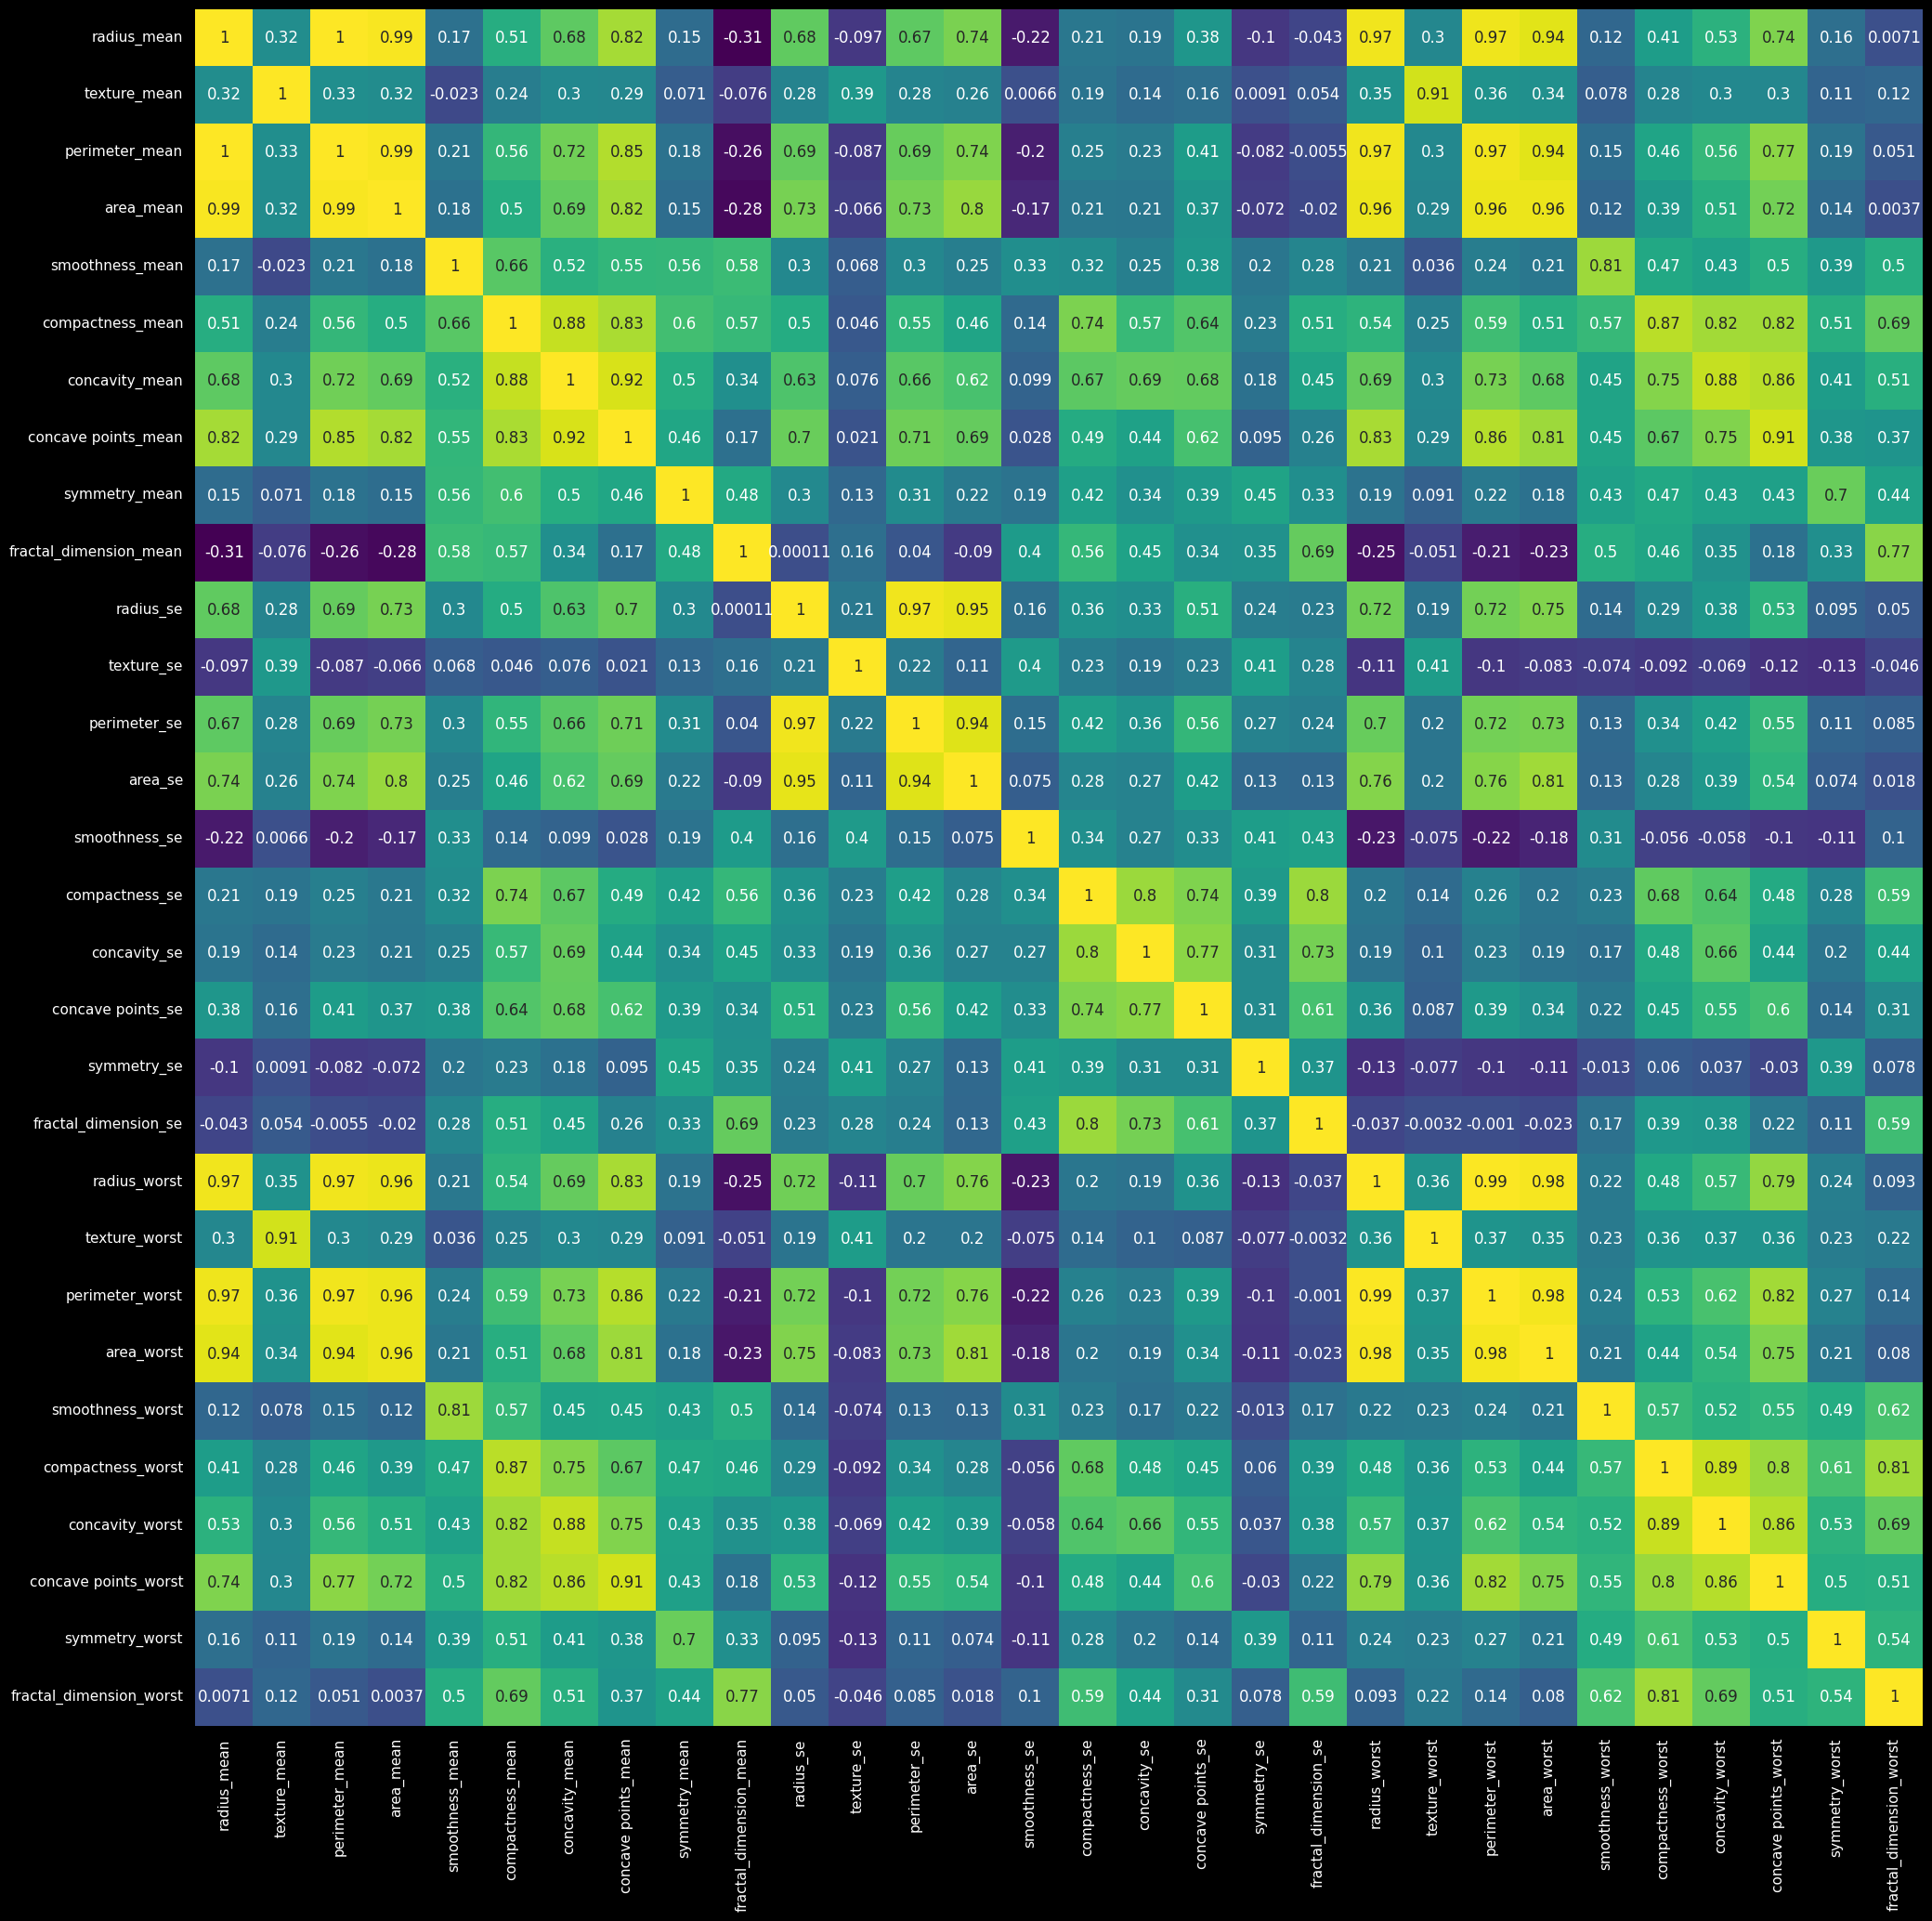

In [86]:
import seaborn as sns
# What features correlate?
def corr_scatter():
    fig, ax = plt.subplots(30,30, figsize=(4*30,4*30))
    fig.tight_layout(h_pad=5,w_pad=3)
    ax = ax.flatten()
    c = 0
    for c1 in bc_data.columns[2:]:
        for c2 in bc_data.columns[2:]:
            try:
                ax[c].scatter(x=bc_data[c1][bc_data.diagnosis == 'B'],y=bc_data[c2][bc_data.diagnosis == 'B'], alpha=0.8, color = 'cyan')
                ax[c].scatter(x=bc_data[c1][bc_data.diagnosis == 'M'],y=bc_data[c2][bc_data.diagnosis == 'M'], alpha=0.8, color = 'pink')
                ax[c].set_xlabel('values', size=4)
                ax[c].set_ylabel('counts', size=4)
                ax[c].set_title(f'{c1} and {c2}', size=4)
            except IndexError:
                pass
            c +=1

def corr_heatmap():
     sns.heatmap(bc_data.iloc[:,2:].corr(),annot=True, cbar=False, cmap='viridis')
     sns.set(rc={'figure.figsize':(24,24)})
     plt.show()


corr_heatmap()


In [87]:
from sklearn.preprocessing import StandardScaler
# Data standardization
sc = StandardScaler()
scaled_data = sc.fit_transform(bc_data.iloc[:,2:])


In [88]:
from sklearn.model_selection import train_test_split
#split the data in test and train sets
X = scaled_data
y = bc_data.diagnosis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=420)

X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.20, random_state=69)

X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.20, random_state=999)

In [89]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X1_train = pca.fit_transform(X1_train)
X2_train = pca.fit_transform(X2_train)
X_test = pca.fit_transform(X_test)
X1_test = pca.fit_transform(X1_test)
X2_test = pca.fit_transform(X2_test)

In [90]:
from sklearn.svm import LinearSVC
from sklearn.svm import NuSVC
from sklearn.linear_model import LogisticRegression

clf_lin_svc = LinearSVC()
clf_log_reg = LogisticRegression()
clf_nu_svc = NuSVC()
clf_lin_svc.fit(X_train,y_train)
clf_log_reg.fit(X1_train,y1_train)
clf_nu_svc.fit(X2_train,y2_train)

/home/tim/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


NuSVC()

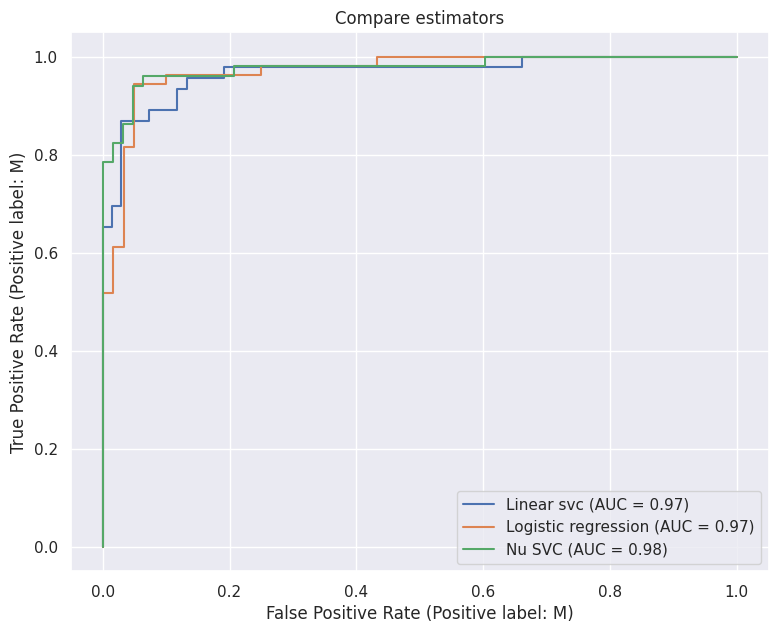

In [91]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize=(9,7))
fig1 = RocCurveDisplay.from_estimator(clf_lin_svc,X_test,y_test)
plt.close()
fig2 = RocCurveDisplay.from_estimator(clf_log_reg,X1_test,y1_test)
plt.close()
fig3 = RocCurveDisplay.from_estimator(clf_nu_svc,X2_test,y2_test)
plt.close()
fig1.plot(ax=ax, name="Linear svc")
fig2.plot(ax=ax, name="Logistic regression")
fig3.plot(ax=ax, name="Nu SVC")
ax.set_title("Compare estimators")

plt.show()